In [43]:
import pandas as pd
import seaborn as sb

In [27]:
df = pd.read_csv("groups.csv", sep="|")
df

,group_id,planned_time,real_time,delay,delay in %,path
0,1,2,2319,2317,115850,München Hbf.7746.Arrival->.13.Walk->München Hb...
1,2,86,2069,1983,2305,Duisburg Hbf.7733.Arrival->137653.150.Trip->Br...
2,3,40,2343,2303,5757,Donauwörth.7755.Arrival->137265.54.Trip->Münch...
3,4,169,2052,1883,1114,München ZOB (Hackerbrücke).7861.Arrival->.12.W...
4,5,272,2298,2026,744,München Hbf.7746.Arrival->.13.Walk->München Hb...
...,...,...,...,...,...,...
1047,1050,169,2052,1883,1114,München ZOB (Hackerbrücke).7861.Arrival->.12.W...
1048,1051,221,2163,1942,878,Davos Monstein.9763.Departure->40852.13.Trip->...
1049,1052,221,2163,1942,878,Davos Monstein.9763.Departure->40852.13.Trip->...
1050,1053,169,2052,1883,1114,München ZOB (Hackerbrücke).7861.Arrival->.12.W...


# Calculate different delay metrics

In [28]:
delay = df["delay"].sum()
delay_perc = df["delay in %"].sum()
print("Total delay:", delay, "min", "=", delay/60, "h")
print("Average delay:", delay/len(df), "min", "=", delay/len(df)/60, "h")
print("Average % delay:", delay_perc/len(df), "%")

Total delay: 2054011 min = 34233.51666666667 h
Average delay: 1952.481939163498 min = 32.54136565272497 h
Average % delay: 3540.4885931558933 %


# Calculate different edge metrics

In [29]:
df = pd.read_csv("edges.csv", sep="|")
df

,edge_index,duration,capacity,utilization
0,EdgeIndex(26275),11,184,6
1,EdgeIndex(1766167),14,0,6
2,EdgeIndex(2607487),20,338,4
3,EdgeIndex(3267389),8,197,1
4,EdgeIndex(614395),4,246,1
...,...,...,...,...
3884,EdgeIndex(2542175),1,209,7
3885,EdgeIndex(3407739),12,194,4
3886,EdgeIndex(2638789),1,447,57
3887,EdgeIndex(3295373),5,110,1


In [54]:
print("Number of strained trip edges:", len(df))
df_filtered = df[df['capacity'] < df['utilization']].loc[:]
print("Number of strained trip edges with utilization > capacity:", len(df_filtered))
df_filtered["overload"] = df_filtered["utilization"]-df_filtered["capacity"]
total_overload = df_filtered["overload"].sum()
print("Total overload (only edges with utilization > capacity):", total_overload)
print("Average overload (only edges with utilization > capacity):", total_overload/len(df_filtered))
print("Max overload of one edge:", df_filtered["overload"].max())

Number of strained trip edges: 3889
Number of strained trip edges with utilization > capacity: 208
Total overload (only edges with utilization > capacity): 1441
Average overload (only edges with utilization > capacity): 6.927884615384615
Max overload of one edge: 42


<AxesSubplot:xlabel='overload', ylabel='Count'>

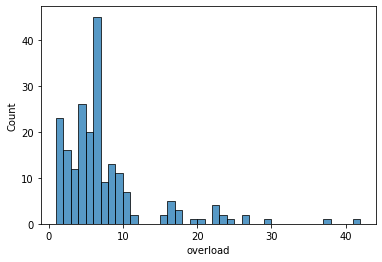

In [57]:
sb.histplot(df_filtered, x="overload", bins=range(1, df_overload.max()+1))